In [1]:
import numpy as np
import mixsol as mx
import pandas as pd
import seaborn as sns

Decide our stock solutions and intermediate endpoint solutions

In [154]:
stocks = []
for ma in [0,1]:
    for cs in [0, 0.1]:
        fa = 1-ma

        stocks.append(mx.Solution(
                solutes=dict(
                    Cs = cs,
                    MA = ma*(1-cs),
                    FA = fa*(1-cs),
                    Pb=1,
                    I=3*fa,
                    Br=3*ma
                ),
                solvent="DMF9_DMSO1",
                molarity=1.2
            )
        )

In [162]:
endpoints = []
for ma in [0, 0.5]:
    for cs in [0, 0.1]:
        fa = 1-ma

        endpoints.append(mx.Solution(
                solutes=dict(
                    Cs = cs,
                    MA = ma*(1-cs),
                    FA = fa*(1-cs),
                    Pb=1,
                    I=3*fa,
                    Br=3*ma
                ),
                solvent="DMF9_DMSO1",
                molarity=1.2
            )
        )

Calculate mixing protocol from stocks -> endpoints

In [163]:
endpointmixer = mx.Mixer(
    stock_solutions=stocks,
    targets = {
        soln:500
        for soln in endpoints
    }
)
endpointmixer.solve(
    min_volume=100,
    strategy="prefer_stock"
)

In [164]:
endpointmixer.print()

===== Stock Prep =====
250.00 of 1.2M MA_Pb_Br3 in DMF0.9_DMSO0.1
750.00 of 1.2M Cs0.1_FA0.9_Pb_I3 in DMF0.9_DMSO0.1
750.00 of 1.2M FA_Pb_I3 in DMF0.9_DMSO0.1
250.00 of 1.2M Cs0.1_MA0.9_Pb_Br3 in DMF0.9_DMSO0.1
====== Mixing =====
Distribute 1.2M MA_Pb_Br3 in DMF0.9_DMSO0.1:
	250.00 to 1.2M MA0.5_FA0.5_Pb_I1.5_Br1.5 in DMF0.9_DMSO0.1
Distribute 1.2M Cs0.1_FA0.9_Pb_I3 in DMF0.9_DMSO0.1:
	250.00 to 1.2M Cs0.1_MA0.45_FA0.45_Pb_I1.5_Br1.5 in DMF0.9_DMSO0.1
Distribute 1.2M FA_Pb_I3 in DMF0.9_DMSO0.1:
	250.00 to 1.2M MA0.5_FA0.5_Pb_I1.5_Br1.5 in DMF0.9_DMSO0.1
Distribute 1.2M Cs0.1_MA0.9_Pb_Br3 in DMF0.9_DMSO0.1:
	250.00 to 1.2M Cs0.1_MA0.45_FA0.45_Pb_I1.5_Br1.5 in DMF0.9_DMSO0.1


Determine list of accessible compositions for on-demand mixing by active learner

In [165]:
mixer = mx.Mixer(
    stock_solutions=stocks,
    targets=None
    )

In [166]:
accessible = mixer.all_possible_solutions(
    min_volume=10,
    target_volume=100,
    precision=2,
    molarity=1
)

In [167]:
df = pd.DataFrame(
    [a.solutes for a in accessible]
)/1.2

<AxesSubplot:xlabel='FA', ylabel='MA'>

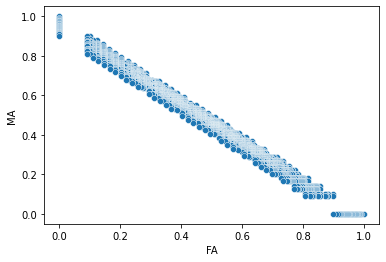

In [168]:
sns.scatterplot(
    data=df,
    x='FA',
    y='MA'
)



<AxesSubplot:xlabel='Cs', ylabel='MA'>

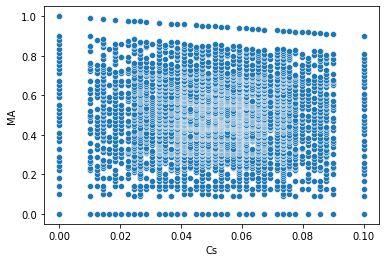

In [169]:
sns.scatterplot(
    data=df,
    x='Cs',
    y='MA'
)



In [28]:
inaccessible = []

for t in tqdm(targets):
    out = mixer.mix(target=t, volume=50, min_volume=10, max_inputs=5)
    if type(out) == float:
        inaccessible.append(t)

  0%|          | 0/231 [00:00<?, ?it/s]

In [29]:
len(inaccessible)/len(targets)

0.6753246753246753

-----

In [ ]:
mixer = mx.Mixer(
    stock_solutions=endpoints,
    targets = {t:50 for t in targets}
)

In [ ]:
mixer.solve(
    min_volume=20,
    max_inputs=3,
    max_generations=3
)

KeyboardInterrupt: 